In [1]:
import numpy as np
from PIL import Image as im
import pandas as pd
import os
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt
import itertools as it
import seaborn as sns
from tensorflow import keras 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.regularizers import l2
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
# Laod the Data

In [3]:
test_Data = np.load('test_Images.npy')

In [4]:
test_labels=pd.read_csv('test_labels.csv')

## Pre=Process the Data

In [5]:
valid_Blurred=[]

In [6]:
kernelSizes = (3, 3)
# loop over the kernel sizes and apply a "Gaussian" blur to the image
for Image in test_Data:
    valid_Blurred.append(cv2.GaussianBlur(Image, kernelSizes, 0))

In [7]:
valid_Pre_Process_Dataset=[]
norm_img=np.zeros((256,256))
for Image in valid_Blurred:
    valid_Pre_Process_Dataset.append(cv2.normalize(Image,  norm_img, 0, 255, cv2.NORM_MINMAX))

In [8]:
enc = OneHotEncoder(handle_unknown='ignore')
# transform data
Y_valid = enc.fit_transform(test_labels[['Label']]).toarray()

In [9]:
X_valid=np.asarray(valid_Pre_Process_Dataset)

# Confusion Matrix
Most threshold metrics can be best understood by the terms used in a confusion matrix for a binary (two-class) classification problem. This does not mean that the metrics are limited for use on binary classification; it is just an easy way to quickly understand what is being measured.

The confusion matrix provides more insight into not only the performance of a predictive model but also which classes are being predicted correctly, which incorrectly, and what type of errors are being made.

In [10]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.rcParams["figure.figsize"] = (80,20)
    # update the overall font size
    plt.rcParams.update({'font.size':30})
    plt.labelsize=200
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=90)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm=cm.astype('float'/cm.sum(axis=1))[:,np.newaxis]
        print("normalize confusion matrix" )
    else:
        print("Confusion matrix, without normalization")
    print(cm)
    
    thresh=cm.max()/2
    for i,j in it.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

# Classification_report
A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score

**Precision** summarizes the fraction of examples assigned the positive class that belong to the positive class.

**Precision = TruePositive / (TruePositive + FalsePositive)**

**Recall** summarizes how well the positive class was predicted and is the same calculation as sensitivity.

**Recall = TruePositive / (TruePositive + FalseNegative)**

Precision and recall can be combined into a single score that seeks to balance both concerns, called the F-score or the F-measure.

**F-Measure = (2 * Precision * Recall) / (Precision + Recall)**

# ResNet50V2 Model

In [38]:
# Load the Model
Resnet_model=keras.models.load_model('Resnet_model_final.h5')

In [39]:
## Prediction using Resnet Model
y_pred=Resnet_model.predict(X_valid)

In [40]:
Y_pr=np.argmax(y_pred,axis=1)
Y_vl=np.argmax(Y_valid,axis=1)

### Confusion Matrix

Confusion matrix, without normalization
[[205   4   1   1   2   0   1   0   2   0]
 [  4 406   3   1   2   0   2   0   2   0]
 [  0   4 312   0   0   0   1   0   7   0]
 [  0   0   1 118   0   0   0   0   1   0]
 [  2   4   0   0 448   8   0   0   6   0]
 [  0   2   0   0   5 101   0   0   0   0]
 [  1   4   1   0   4   0 211   5   2   0]
 [  0   0   0   0   0   0   9  39   0   0]
 [  2   2   1   0   8   0   2   2 367   0]
 [  0   0   0   0   0   0   0   0   0 276]]


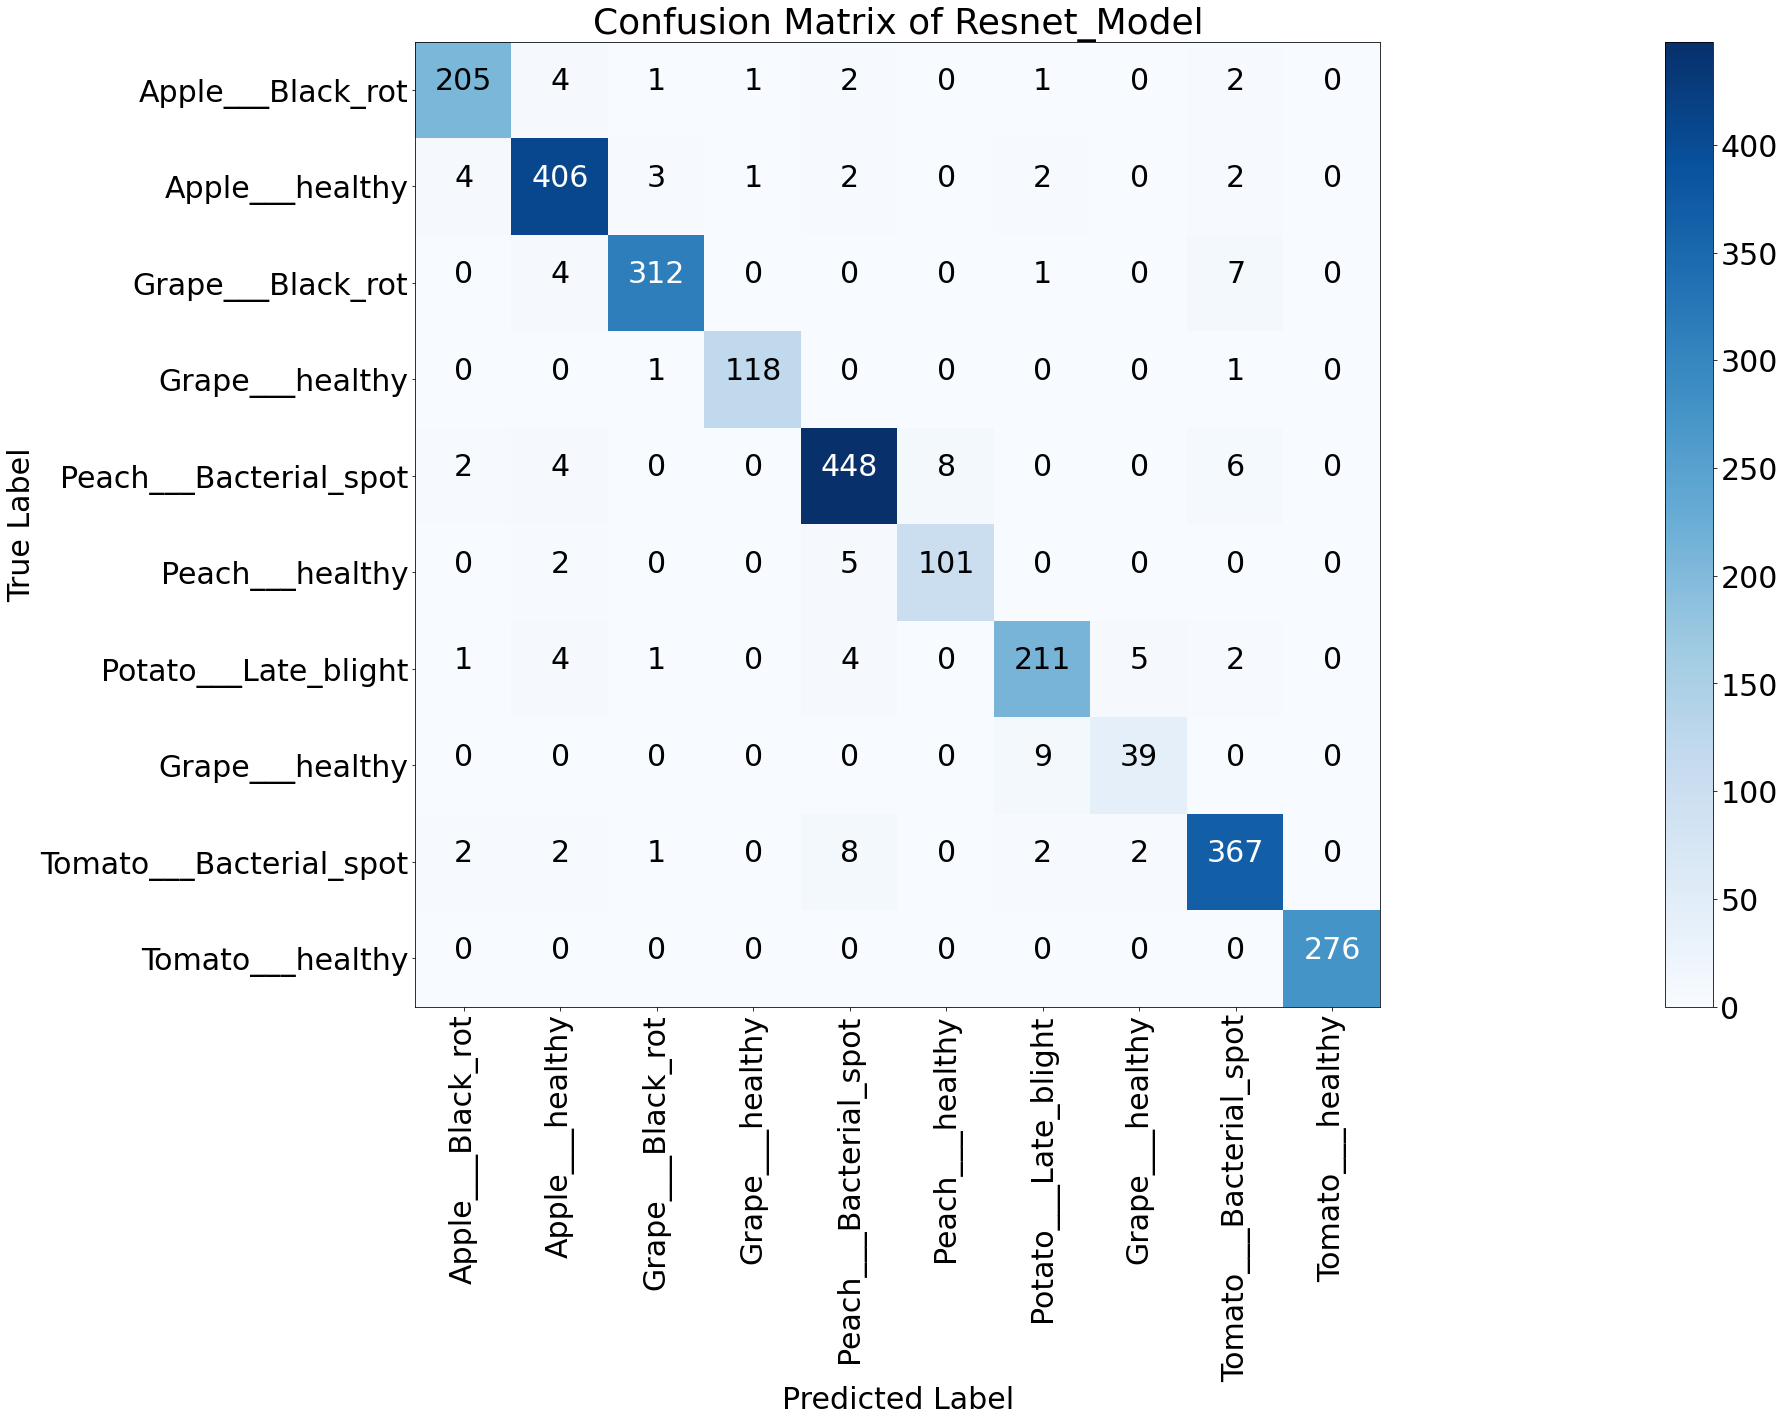

In [41]:
cm=confusion_matrix(Y_vl,Y_pr)
cm_plot_label=['Apple___Black_rot','Apple___healthy','Grape___Black_rot','Grape___healthy','Peach___Bacterial_spot','Peach___healthy'
                           ,'Potato___Late_blight','Grape___healthy','Tomato___Bacterial_spot','Tomato___healthy']
plot_confusion_matrix(cm,cm_plot_label,title='Confusion Matrix of Resnet_Model')

### Classification Report

In [42]:
print(classification_report(Y_vl,Y_pr))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       216
           1       0.95      0.97      0.96       420
           2       0.98      0.96      0.97       324
           3       0.98      0.98      0.98       120
           4       0.96      0.96      0.96       468
           5       0.93      0.94      0.93       108
           6       0.93      0.93      0.93       228
           7       0.85      0.81      0.83        48
           8       0.95      0.96      0.95       384
           9       1.00      1.00      1.00       276

    accuracy                           0.96      2592
   macro avg       0.95      0.94      0.95      2592
weighted avg       0.96      0.96      0.96      2592



# MobileNetV2 Model

In [43]:
# Load the Model
MobileNet_model=keras.models.load_model('MobileNet_model.h5')

In [44]:
## Prediction using Resnet Model
y_pred=MobileNet_model.predict(X_valid)

In [45]:
Y_pr=np.argmax(y_pred,axis=1)
Y_vl=np.argmax(Y_valid,axis=1)

### Confusion Matrix

Confusion matrix, without normalization
[[205   4   1   1   2   0   1   0   2   0]
 [  4 406   3   1   2   0   2   0   2   0]
 [  0   4 312   0   0   0   1   0   7   0]
 [  0   0   1 118   0   0   0   0   1   0]
 [  2   4   0   0 448   8   0   0   6   0]
 [  0   2   0   0   5 101   0   0   0   0]
 [  1   4   1   0   4   0 211   5   2   0]
 [  0   0   0   0   0   0   9  39   0   0]
 [  2   2   1   0   8   0   2   2 367   0]
 [  0   0   0   0   0   0   0   0   0 276]]


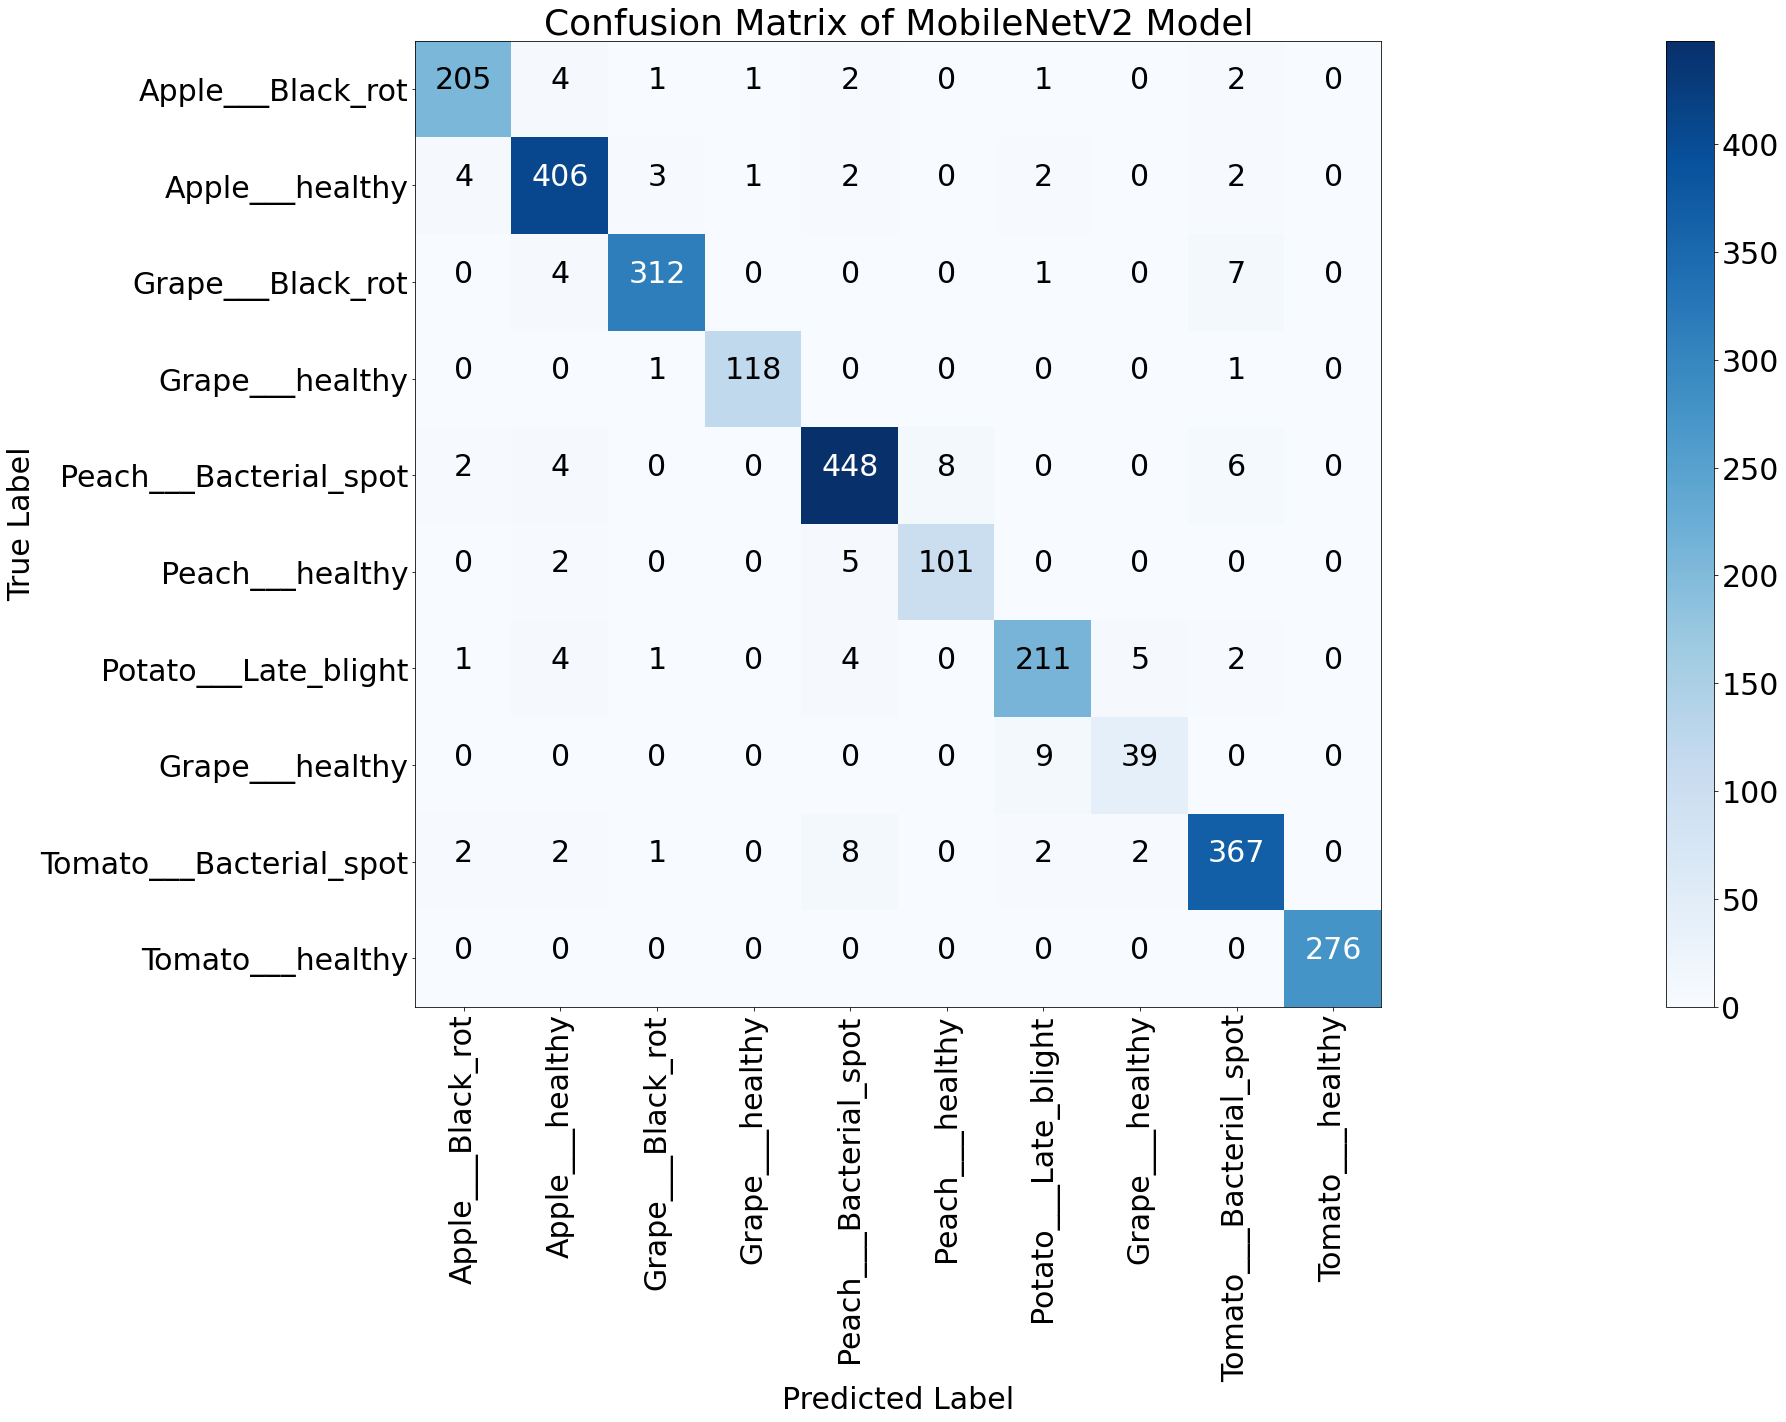

In [46]:
cm=confusion_matrix(Y_vl,Y_pr)
cm_plot_label=['Apple___Black_rot','Apple___healthy','Grape___Black_rot','Grape___healthy','Peach___Bacterial_spot','Peach___healthy'
                           ,'Potato___Late_blight','Grape___healthy','Tomato___Bacterial_spot','Tomato___healthy']
plot_confusion_matrix(cm,cm_plot_label,title='Confusion Matrix of MobileNetV2 Model')

### Classification Report

In [47]:
print(classification_report(Y_vl,Y_pr))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       216
           1       0.95      0.97      0.96       420
           2       0.98      0.96      0.97       324
           3       0.98      0.98      0.98       120
           4       0.96      0.96      0.96       468
           5       0.93      0.94      0.93       108
           6       0.93      0.93      0.93       228
           7       0.85      0.81      0.83        48
           8       0.95      0.96      0.95       384
           9       1.00      1.00      1.00       276

    accuracy                           0.96      2592
   macro avg       0.95      0.94      0.95      2592
weighted avg       0.96      0.96      0.96      2592



# Xception Model

In [48]:
# Load the Model
Xception_model=keras.models.load_model('Xception_model_final.h5')

In [49]:
## Prediction using Resnet Model
y_pred=Xception_model.predict(X_valid)

In [50]:
Y_pr=np.argmax(y_pred,axis=1)
Y_vl=np.argmax(Y_valid,axis=1)

### Confusion Matrix

Confusion matrix, without normalization
[[182  18   2   0   5   0   4   0   2   3]
 [ 14 355   2   1  17   3  13   3  12   0]
 [  0   9 296   4   3   0   4   0   8   0]
 [  0   5   3 106   0   0   3   0   3   0]
 [  0  12   4   0 423  15   2   0  12   0]
 [  0   2   0   0  14  92   0   0   0   0]
 [  1  11   4   1   6   0 186  10   9   0]
 [  1   1   0   0   1   0  17  26   0   2]
 [  1   6   3   1  13   2   6   2 349   1]
 [  2   0   0   0   0   0   0   0   0 274]]


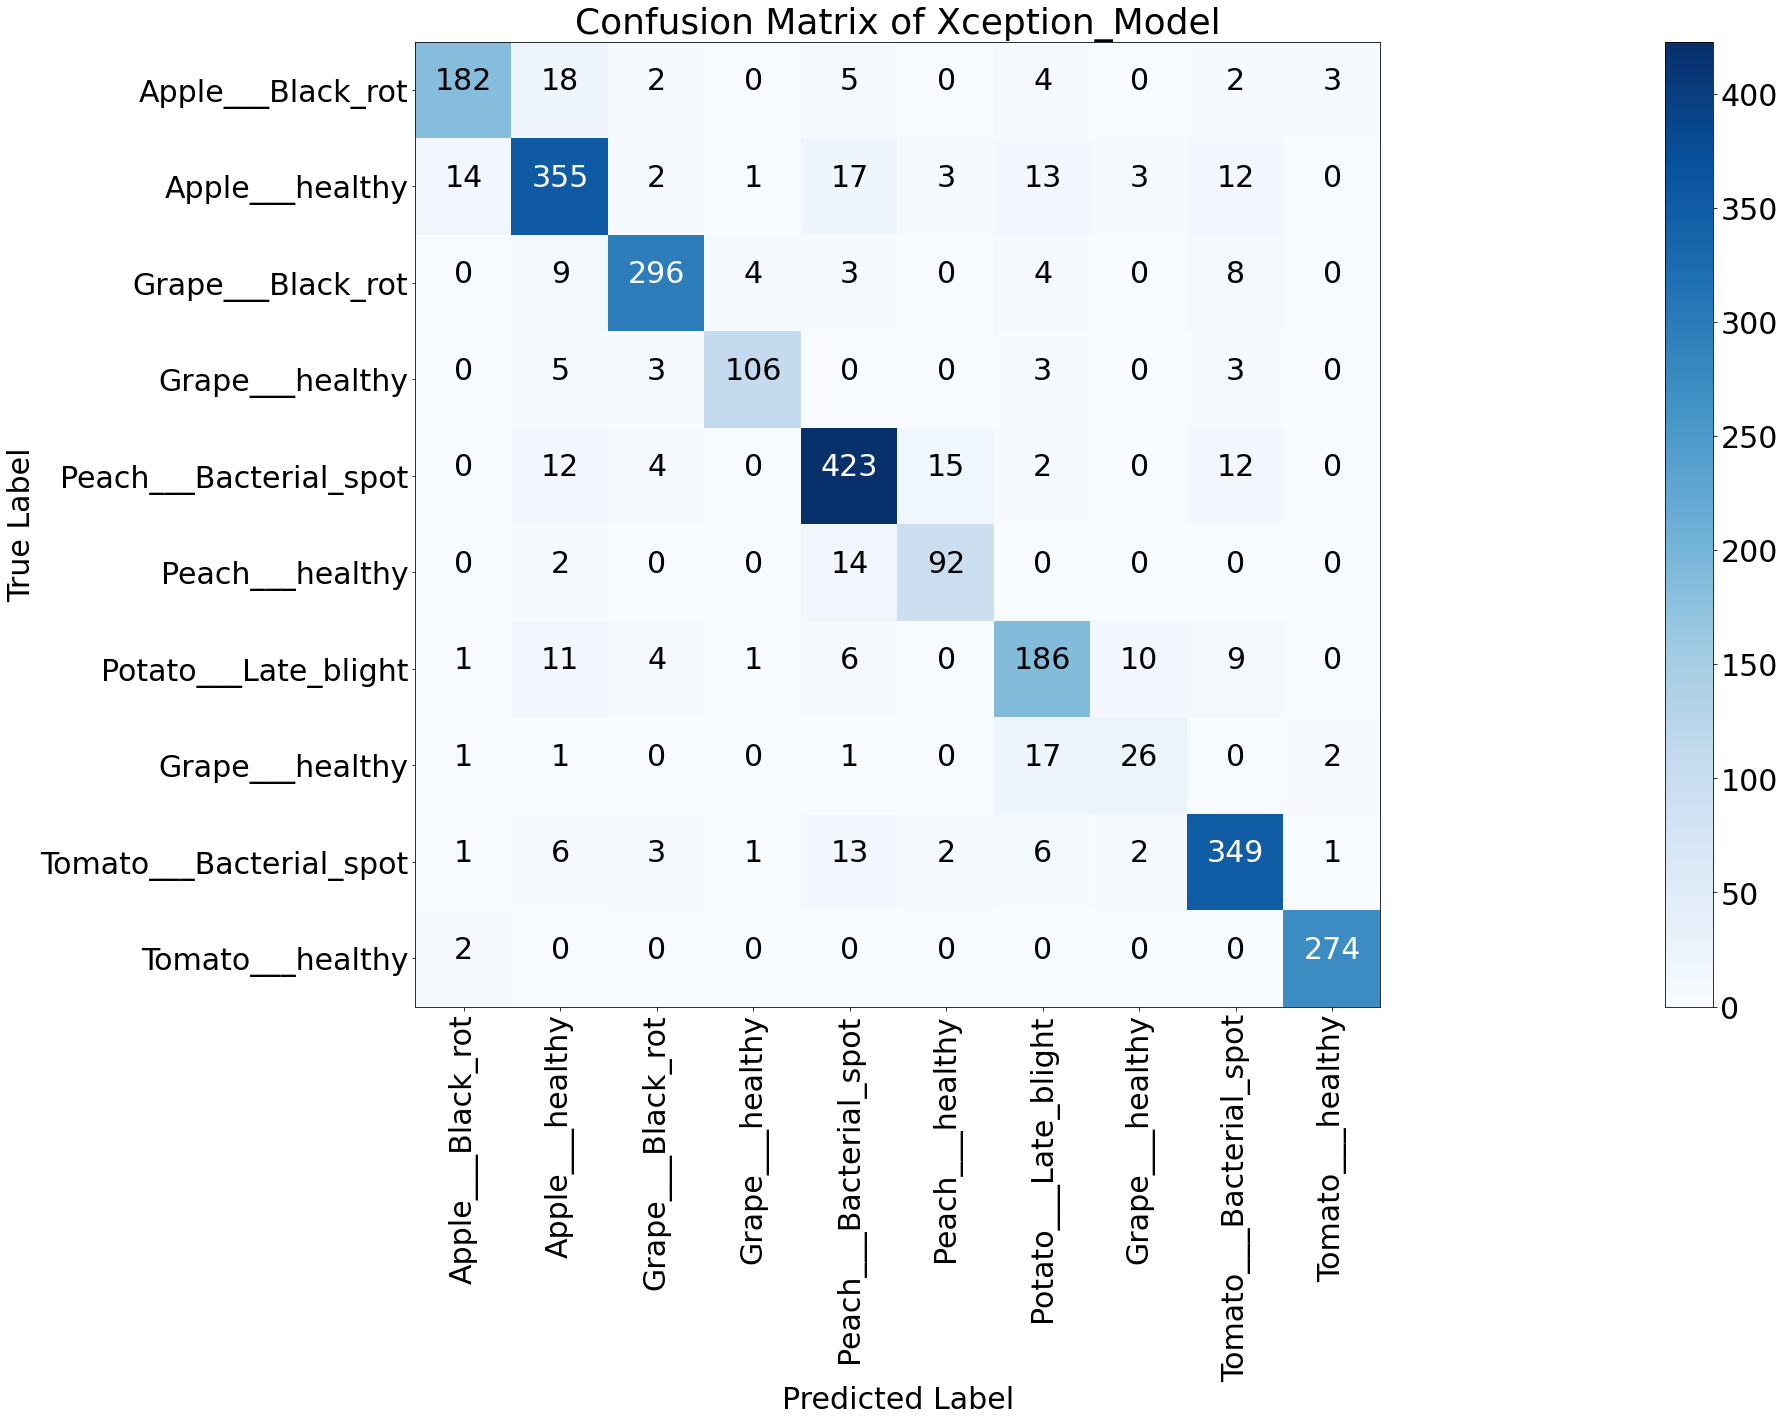

In [51]:
cm=confusion_matrix(Y_vl,Y_pr)
cm_plot_label=['Apple___Black_rot','Apple___healthy','Grape___Black_rot','Grape___healthy','Peach___Bacterial_spot','Peach___healthy'
                           ,'Potato___Late_blight','Grape___healthy','Tomato___Bacterial_spot','Tomato___healthy']
plot_confusion_matrix(cm,cm_plot_label,title='Confusion Matrix of Xception_Model')

### Classification Report

In [52]:
print(classification_report(Y_vl,Y_pr))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       216
           1       0.85      0.85      0.85       420
           2       0.94      0.91      0.93       324
           3       0.94      0.88      0.91       120
           4       0.88      0.90      0.89       468
           5       0.82      0.85      0.84       108
           6       0.79      0.82      0.80       228
           7       0.63      0.54      0.58        48
           8       0.88      0.91      0.90       384
           9       0.98      0.99      0.99       276

    accuracy                           0.88      2592
   macro avg       0.86      0.85      0.86      2592
weighted avg       0.88      0.88      0.88      2592



# VGG16

In [53]:
# Load the Model
VGG16_model=keras.models.load_model('VGG16_model.h5')

In [54]:
## Prediction using Resnet Model
y_pred=VGG16_model.predict(X_valid)

In [55]:
Y_pr=np.argmax(y_pred,axis=1)
Y_vl=np.argmax(Y_valid,axis=1)

### Confusion Matrix

Confusion matrix, without normalization
[[213   2   0   0   1   0   0   0   0   0]
 [  1 419   0   0   0   0   0   0   0   0]
 [  0   0 324   0   0   0   0   0   0   0]
 [  0   0   0 120   0   0   0   0   0   0]
 [  0   2   0   0 466   0   0   0   0   0]
 [  0   0   0   0   4 104   0   0   0   0]
 [  0   1   0   0   0   0 227   0   0   0]
 [  0   0   0   0   0   0   4  44   0   0]
 [  0   0   0   0   0   0   0   0 384   0]
 [  0   0   0   0   0   0   0   0   0 276]]


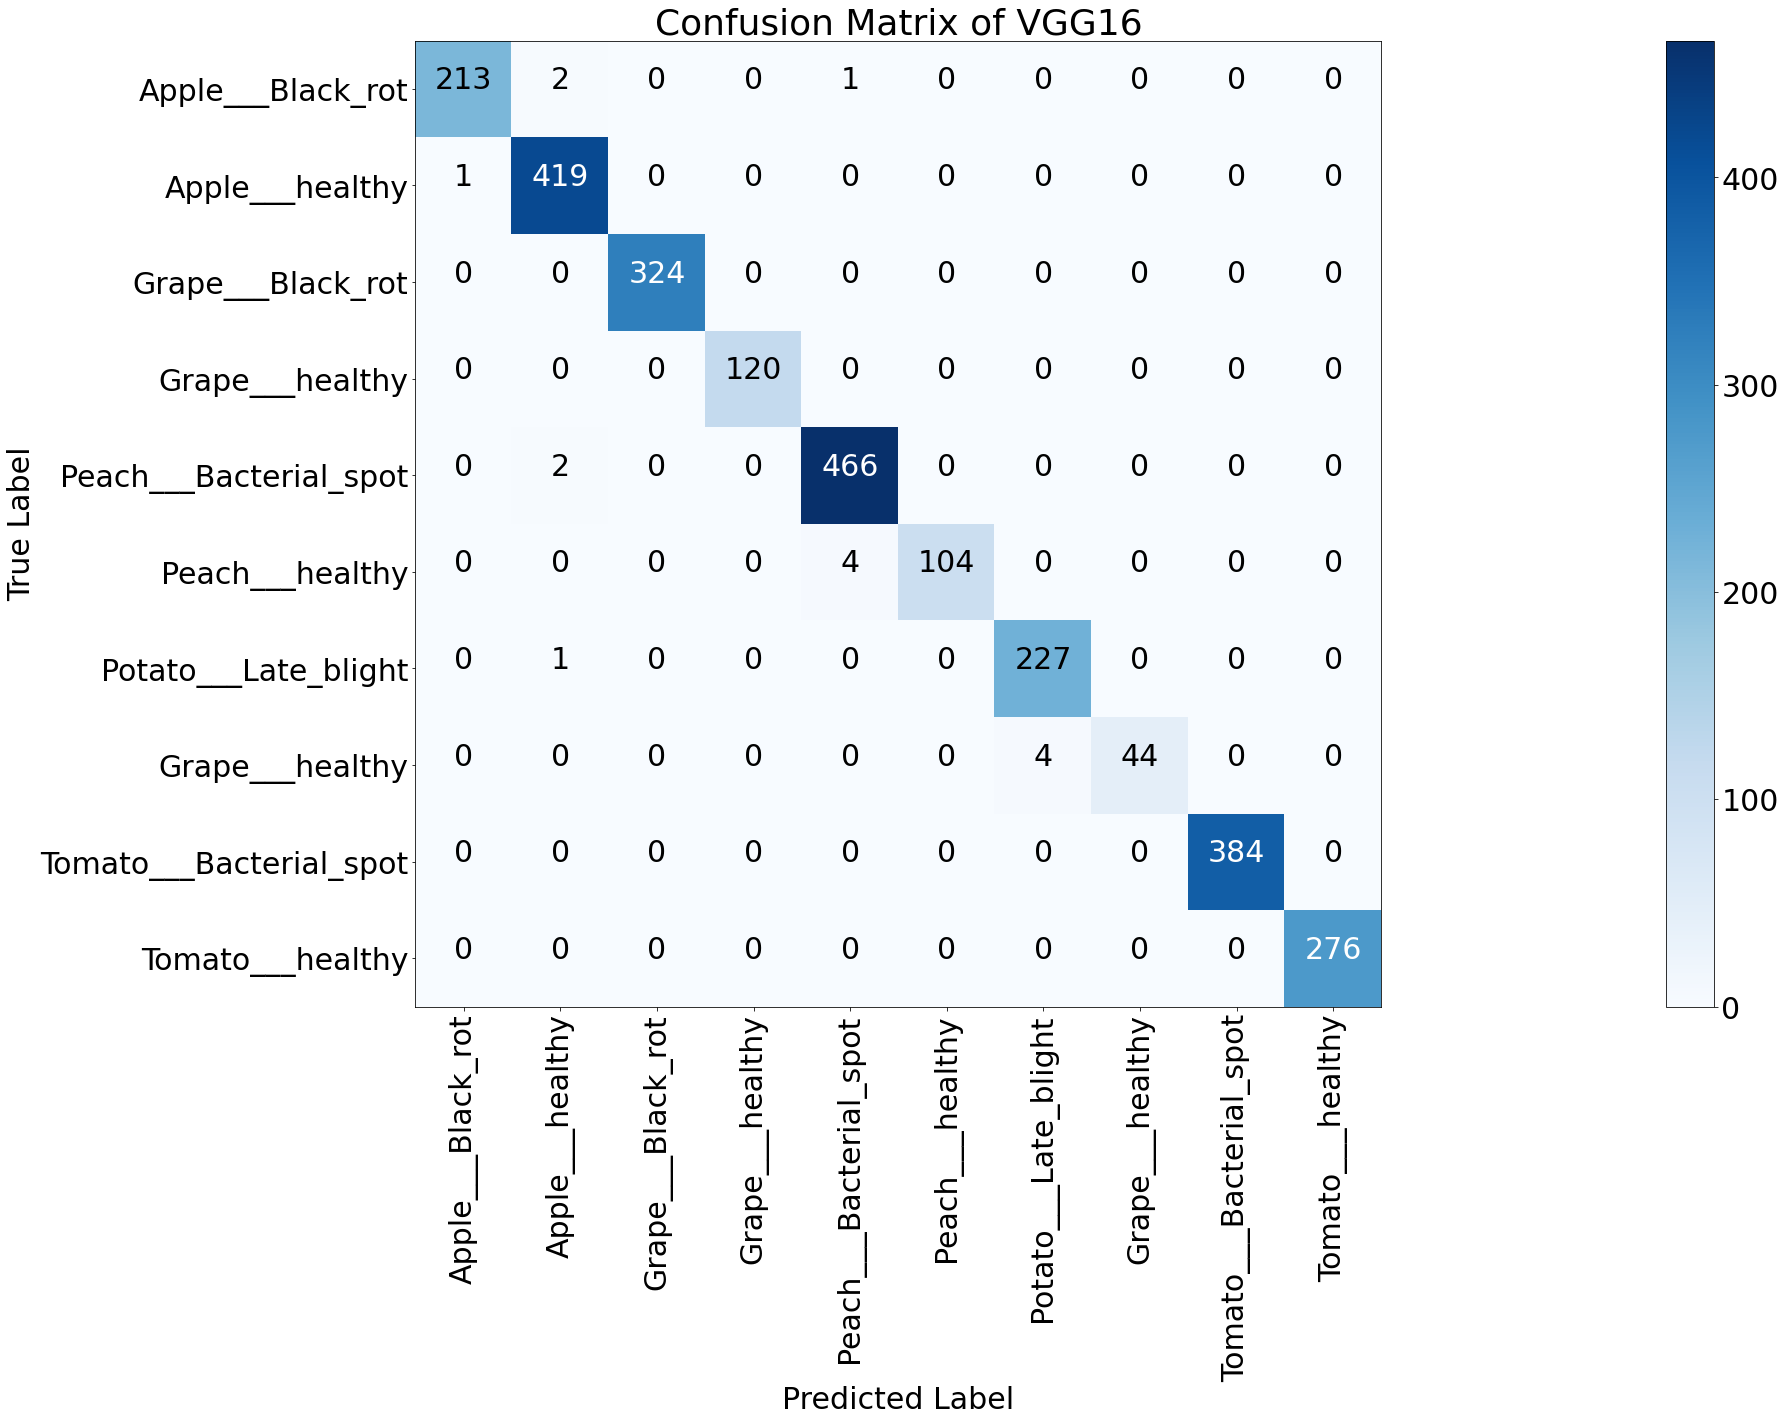

In [56]:
cm=confusion_matrix(Y_vl,Y_pr)
cm_plot_label=['Apple___Black_rot','Apple___healthy','Grape___Black_rot','Grape___healthy','Peach___Bacterial_spot','Peach___healthy'
                           ,'Potato___Late_blight','Grape___healthy','Tomato___Bacterial_spot','Tomato___healthy']
plot_confusion_matrix(cm,cm_plot_label,title='Confusion Matrix of VGG16')

### Classification Report

In [57]:
print(classification_report(Y_vl,Y_pr))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       216
           1       0.99      1.00      0.99       420
           2       1.00      1.00      1.00       324
           3       1.00      1.00      1.00       120
           4       0.99      1.00      0.99       468
           5       1.00      0.96      0.98       108
           6       0.98      1.00      0.99       228
           7       1.00      0.92      0.96        48
           8       1.00      1.00      1.00       384
           9       1.00      1.00      1.00       276

    accuracy                           0.99      2592
   macro avg       1.00      0.99      0.99      2592
weighted avg       0.99      0.99      0.99      2592



# Discussion

* All the Model perform very well except **Xception** whose results is not that promising 
* VGG16 outclass all the other Model performance as it's give above 0.95 F1-score for all the classes.